<a href="https://colab.research.google.com/github/hopedom/DS5/blob/main/day4_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 프로젝트


과정 개요
___
Boston 주택 가격 예측 모델
- 여러 데이터를 받아서 가격을 예측하는 프로젝트를 진행해봅니다.
<br>

Reuters 딥러닝 모델
- 시퀀스 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.
<br>

CIFAR10 딥러닝 모델
- 이미지 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

## Boston 주택 가격 예측 모델

Boston 주택 가격 예측 모델에서 사용되는 데이터셋은 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있습니다.

<br>

- 데이터셋의 feature에 대한 설명
<br>


| feature | 설명 |
|:---|:---|
| CRIM | 자치시별 1인당 범죄율 |
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 |
| INDUS | 비소매상업지역이 점유하고 있는 토지의 비율 |
| CHAS | 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) |
| NOX | 10ppm 당 농축 일산화질소 |
| RM | 주택 1가구당 평균 방의 개수 |
| AGE | 1940년 이전에 건축된 소유주택의 비율 |
| DIS | 5개의 보스턴 직업센터까지의 접근성 지수 |
| RAD | 방사형 도로까지의 접근성 지수 |
| TAX | 10,000 달러당 재산세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | $1000(Bk - 0.63)^2$, 여기서Bk는 자치시별 흑인의 비율을 말함 |
| LSTAT | 모집단의 하위계층의 비율(%) |
| MEDV | 본인 소유의 주택가격(중앙값)(단위: $1,000) |

데이터 로드 및 전처리
___
먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


- 데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 아래의 주석을 보고 코드를 작성해 보세요.





In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data_scaled = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data_scaled = train_data_scaled / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data_scaled = (test_data - mean) / std

### 모델 구성 및 컴파일
___
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다.  
- `Sequential()` 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [4]:
import random
import numpy as np
import tensorflow as tf

def set_seed(seed_value):
    # 1. 파이썬의 무작위성을 제어
    random.seed(seed_value)

    # 2. 넘파이의 무작위성을 제어
    np.random.seed(seed_value)

    # 3. 텐서플로의 무작위성을 제어
    tf.random.set_seed(seed_value)

# 학습 시작 전에 원하는 시드값으로 함수 호출
set_seed(42)

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

from tensorflow.keras import optimizers, regularizers
import keras
from tensorflow.keras.regularizers import l2


model = models.Sequential()
model.add(keras.Input(shape=(train_data.shape[1], ), name='input'))

model.add(layers.Dense(256, activation='relu', name='dense31', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)))

model.add(layers.Dense(128, activation='relu', name='dense21', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)))

model.add(layers.Dense(64, activation='relu', name='dense11', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)))

model.add(layers.Dense(1, activation='linear', name='output'))

model.summary()

model.compile(loss='mse',
              optimizer=optimizers.Adam(learning_rate=0.0005),
              metrics=['mae'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense31 (Dense)                 │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense21 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense11 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

모델 학습
___
- epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [6]:
# train, validation set split
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data_scaled, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

In [7]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('boston_housing_model.keras',
                                           save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 487ms/step - loss: 454.0789 - mae: 19.1098 - val_loss: 438.2077 - val_mae: 18.5159
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 353.8611 - mae: 16.3850 - val_loss: 326.9219 - val_mae: 15.4992
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 258.8919 - mae: 13.5895 - val_loss: 225.0967 - val_mae: 12.5535
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 176.8064 - mae: 10.9298 - val_loss: 142.9048 - val_mae: 9.8780
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 115.9296 - mae: 8.6441 - val_loss: 87.0057 - val_mae: 7.5628
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 78.8035 - mae: 6.9075 - val_loss: 58.1803 - val_mae: 5.9868
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 61.2665 - mae: 6.0008 - val_loss: 46.3292 - val_mae: 5.3659
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 52.3859 - mae: 5.4359 - val_loss: 38.9575 - val_mae: 4.7777
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s

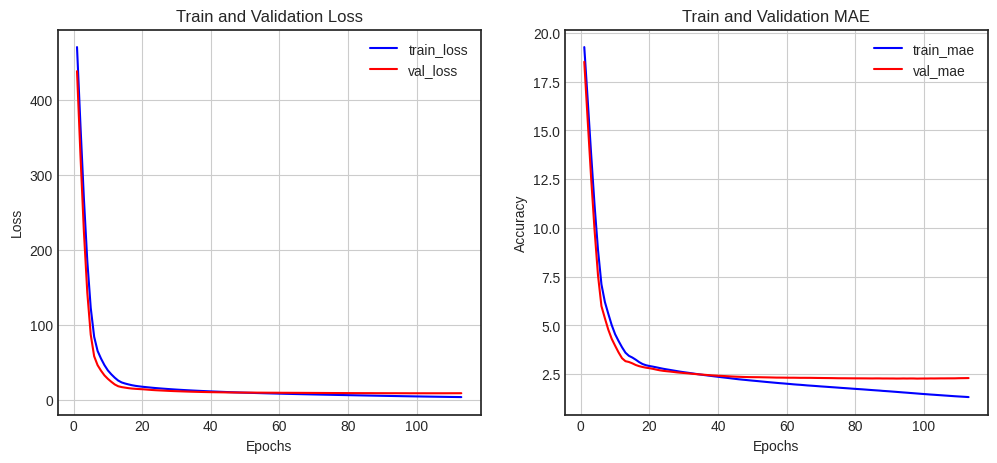

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
___
- 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [9]:
loss, mae = model.evaluate(test_data_scaled, test_labels)

print(f'loss: {loss:.4f}, mae: {mae:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 12.9496 - mae: 2.5359
loss: 16.9860, mae: 2.6973


튜닝 기록
___
-  기본 모델--> loss: 27.9092, mae: 4.1520
-  튜닝1: 가중치 초기화 + epoch 100회 --> loss: 22.1434, mae: 3.5358
-  튜닝2: Dense(128) 추가 --> loss: 24.2412, mae: 3.1803
-  튜닝3: Dense(256) 추가 (epoch 32에서 멈춤) --> loss: 21.2450, mae: 3.0838
-  튜닝4: adam의 학습률(0.001 --> 0.0005) 수정 --> loss: 18.3352, mae: 2.8381
-  튜닝5: adam의 학습률(0.0005 --> 0.0001) 수정 --> loss: 23.1143, mae: 3.1839
-  튜닝6: epoch 200회로 수정 --> loss: 21.9760, mae: 3.1944
-  튜닝7: adam의 학습률 복구, Dense(32) 추가 --> loss: 25.1144, mae: 3.1834
-  튜닝8: 튜닝4의 모델 + 배치크기 조정 (128 --> 64) --> loss: 14.4834, mae: 2.5541
    - epoch가 33까지 밖에 수행이 안되었음. 과적합 의심
-  튜닝9: 배치 크기 조정 (64 --> 32) --> loss: 21.2122, mae: 2.8870
    - epoch가 23까지 밖에 수행이 안되었음. 과적합 의심
- 튜닝10: 튜닝8 설정에 dropout(0.2) 추가 --> loss: 23.1143, mae: 3.1777
- 튜닝11; dropout 비율 조정(0.2 --> 0.1) --> loss: 21.9758, mae: 3.0056
- 튜닝12: dropout 삭제. L2 정규화(0.001) 적용 --> loss: 23.0361, mae: 2.9588
- 튜닝13: L2 정규화 강도 조절(0.001 -> 0.0005) --> loss: 16.9860, mae: 2.6973
  - 이 결과를 최종모델로 선정하였습니다.



## Reuters 딥러닝 모델

이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습합니다. 하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있습니다.

8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용해 보세요.



데이터 로드 및 전처리
___
- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 `keras.datasets`에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 `train_test_split` 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [11]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# train/test split
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# train/val split from train_data
split_idx = len(train_data) // 4 *3

val_data = train_data[split_idx:]
train_data = train_data[:split_idx]

val_labels = train_labels[split_idx:]
train_labels = train_labels[:split_idx]


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6735
2247
2246
46


In [12]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
from tensorflow.keras import utils

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

### 모델 구성 및 컴파일
___
`BatchNormalization`과 `Dropout`을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [13]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(keras.Input(shape=(x_train.shape[1], ), name='input'))

model.add(layers.Dense(128, name='dense1', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, name='dense2', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                  │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

모델 학습
___
`ModelCheckpoint`와 `EarlyStopping` 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [15]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks


check_point_cb = callbacks.ModelCheckpoint('reuters_model.keras',
                                           save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.0686 - loss: 4.4300 - val_accuracy: 0.4406 - val_loss: 3.8966
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3319 - loss: 3.1934 - val_accuracy: 0.6297 - val_loss: 3.6306
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5179 - loss: 2.4981 - val_accuracy: 0.6747 - val_loss: 3.3716
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6098 - loss: 2.0763 - val_accuracy: 0.6862 - val_loss: 3.1515
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6608 - loss: 1.8272 - val_accuracy: 0.6920 - val_loss: 2.9586
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6948 - loss: 1.6435 - val_accuracy: 0.6992 - val_loss: 2.7856
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7180 - loss: 1.5014 - val_accuracy: 0.7072 - val_loss: 2.6459
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7404 - loss: 1.3802 - val_accuracy: 0

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.





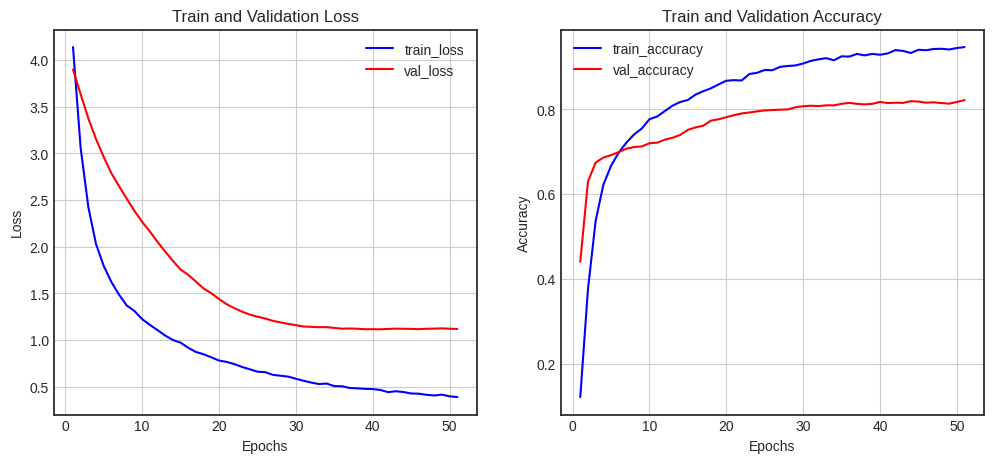

In [16]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
___
- 테스트 데이터셋을 이용해 모델을 평가합니다.

In [17]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
loss, acc = model.evaluate(x_test, y_test)

print(f'loss: {loss:.4f}, accuracy: {acc:.4f}')

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8085 - loss: 1.1608
loss: 1.1693, accuracy: 0.8028


튜닝 기록
___
- 기본 모델 --> loss: 0.9774, accuracy: 0.7894
    - overfitting 되어 있음
- 튜닝1 : 가중치 초기화 추가 --> loss: 0.9696, accuracy: 0.7858
    - 여전히 overfitting 되어 있음
- 튜닝2 : dropout 조정(0.2 --> 0.5)  --> loss: 0.9667, accuracy: 0.7965
- 튜닝3 : L2 규제 추가 --> loss: 1.2122, accuracy: 0.8050
- 튜닝4 : `dense`의 뉴런수 조정(128 -> 64) --> loss: 1.1680, accuracy: 0.7952
- 튜닝5 : 튜닝3 설정 + 학습률(0.005) + ReduceLROnPlateau 콜백 추가 --> loss: 1.1820, accuracy: 0.7970
- 튜닝6 : L2 규제 강화(0.001 -> 0.005) --> loss: 1.2179, accuracy: 0.7912

--> `튜닝3` 모델을 최종 모델로 결정하였습니다.



## CIFAR10 딥러닝 모델

CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.



데이터 로드 및 전처리
___
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [55]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# train/val split from x_train_full
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.2)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.





In [56]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.





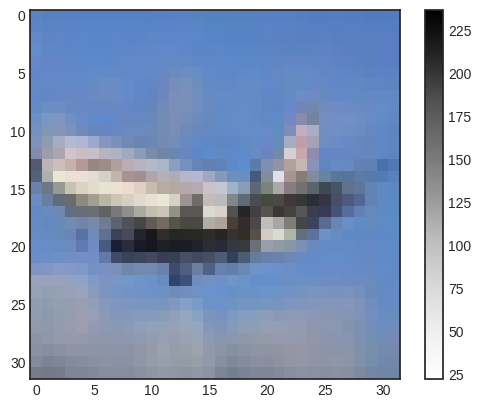

In [57]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [58]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.





In [59]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# x_train = x_train.reshape(x_train.shape[0], 3072)
# x_val = x_val.reshape(x_val.shape[0], 3072)
# x_test = x_test.reshape(x_test.shape[0], 3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [60]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일
___
`BatchNormalization`과 `Dropout`을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [96]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(keras.Input(shape=(32,32,3), name='input'))

model.add(layers.Conv2D(32, (3,3), padding='same', name='conv1_1', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3,3), padding='same', name='conv1_2', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', name='conv2_1', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3,3), padding='same', name='conv2_2', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3,3), padding='same', name='conv3_1', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', name='conv3_2', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.3))

model.add(keras.layers.Flatten())

# model.add(keras.Input(shape=(3072,), name='input'))
model.add(layers.Dense(256, name='dense1', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, name='dense2', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()
# utils.plot_model(model, show_shapes=True)

모델 학습
___
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [97]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.keras',
                                           save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.1480 - loss: 3.1353 - val_accuracy: 0.1067 - val_loss: 3.1060
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2801 - loss: 2.5616 - val_accuracy: 0.1222 - val_loss: 3.3132
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.3350 - loss: 2.3751 - val_accuracy: 0.1544 - val_loss: 3.2039
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.3819 - loss: 2.2424 - val_accuracy: 0.2683 - val_loss: 2.6907
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.4113 - loss: 2.1506 - val_accuracy: 0.3651 - val_loss: 2.3821
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.4419 - loss: 2.0541 - val_accuracy: 0.3735 - val_loss: 2.3498
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4668 - loss: 1.9997 - val_accuracy: 0.3810 - val_loss: 2.3266
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4841 - loss: 1.9398 

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.





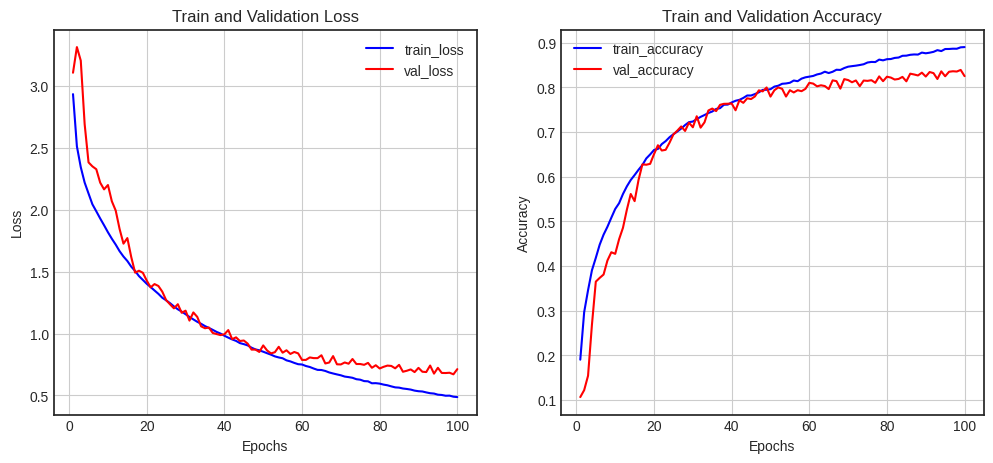

In [98]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
___
- 테스트 데이터셋을 이용해 모델을 평가합니다.

In [99]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
loss, acc = model.evaluate(x_test, y_test)

print(f'loss: {loss:.4f}, accuracy: {acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8410 - loss: 0.6988
loss: 0.6966, accuracy: 0.8363


튜닝 기록
___
- base: loss: 1.4399, accuracy: 0.4887
    - 이미지 분류를 위해 Dense 레이어만으로 분류를 수행하는 것이 의미없다고 판단하여 과감히 CNN구조로 전환하였습니다.
- CNN_base(CNN구조): loss: 1.0801, accuracy: 0.6730
    - 기존 base보다 성능이 좋아졌지만 여전히 부족한 성능이며, overfitting 상태로 보입니다.
- 튜닝1(CNN 레이어에 dropout(0.2) 추가) : loss: 0.6463, accuracy: 0.7787
    - dropout을 추가 후 training-validation 차이는 줄었지만 여전히 accuracy가 낮습니다.
- 튜닝2(옵티마이저의 학습률 조정(0.0005)) : loss: 0.6801, accuracy: 0.7634
    - 학습률을 낮추고 epoch를 늘리는 방향으로 재학습하였지만 여전히 성능향상은 없었습니다.
- 튜닝3(배치 크기 조정(128)) : loss: 0.6765, accuracy: 0.7678
    - overfitting 상태로 보입니다.
- 튜닝4(L2 규제 추가) : loss: 0.7156, accuracy: 0.7730
- 튜닝5(옵티마이저의 학습률 조정(0.00001)) : loss: 0.6891, accuracy: 0.7781
    - 추가 성능향상은 어렵다고 판단됩니다.
    - 이에, 쳇봇에게 자문을 구한 결과, 쳇봇은 (1) transformer 도입 또는 (2) VGG스타일의 CNN블록 추가를 제안하였습니다.
    - transformer는 아직 배우지 않았기 때문에 CNN 블록을 추가하는 VGG 스타일로 모델을 재구성하였습니다.
- 튜닝6(VGG스타일로 CNN 블록 추가) : loss: 0.6497, accuracy: 0.8226
    - 처음으로 accuracy 0.8을 넘어섰습니다만, overfitting 상태로 보입니다.
- 튜닝7(L2 규제 조정(0.0005)) : loss: 0.7879, accuracy: 0.8339
    - 여전히 overfitting된 상태입니다. dropout rate를 수정해보겠습니다.
- 튜닝8(dropout 조정(0.3)) :  loss: 0.6966, accuracy: 0.8363
    - 튜닝6과 튜닝7과 비교하여 눈에 띠게 training-validation 격차가 줄었습니다.
    - 이모델을 최종모델로 결정하였습니다.

총평
- 딥러닝 학습은 모델의 training과 validation의 그래프를 비교하며 상호작용하는 것이 중요한 것 같습니다.
- 이론적으로 많이 아는 것도 중요하지만, 딥러닝 모델 튜닝은 학습된 모델로부터 training과 validation의 그래프를 그린 후 올바른 개선 방향을 판단하는 insight가 정말 중요한 요소일 것 생각이 들었습니다.